In [1]:
import os
import pandas as pd
import numpy as np
import preprocess_data as prep
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

DATA_PATH = '../cell-profiler/measurements'
FILENAME = 'Nuclei.csv'

In [4]:
measurements = prep.cell_data(data_path=DATA_PATH, cytoplasm=False, biomarkers=False)
measurements.shape

Total number of cells processed: 612.0

The numbers of cells and nuclei correspond to each other
The are no repeated column names: True
The are no repeated column names: True


(612, 288)

In [5]:
biomarkers = prep.cell_data(data_path=DATA_PATH, cytoplasm=False, biomarkers=True)
biomarkers.shape

The are no repeated column names: True


(612, 157)

In [7]:
common_columns = ['label', 'image', 'object', 'stiffness', 'combination', 'well', 'site']
features = pd.merge(measurements, biomarkers, how='outer', on=common_columns)
features.shape

(612, 438)

In [8]:
stats = features.describe()
features.drop(stats.columns[stats.loc['std', :] == 0], axis=1, inplace=True)
features.shape

(612, 419)

In [23]:
features['stiffness_num'] = pd.to_numeric(features.stiffness)
numeric_cols = features.select_dtypes(include=[np.number]).columns
feature_cols = features.select_dtypes(include=[np.number]).drop(['stiffness_num'], axis=1).columns

In [24]:
features_norm = features.copy()


features_norm[feature_cols] = (features_norm[feature_cols] - 
                               features_norm[feature_cols].mean()) / features_norm[feature_cols].std()

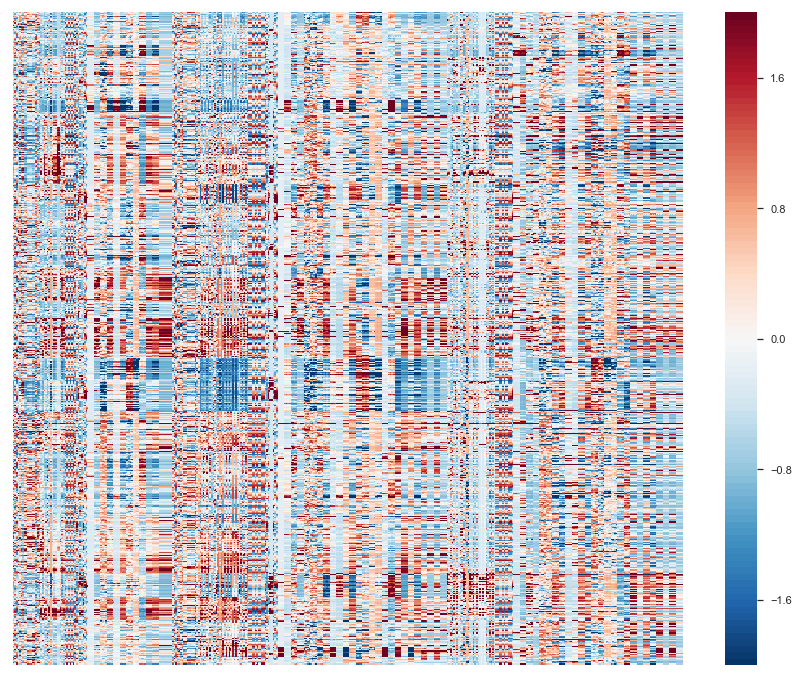

In [26]:
sns.set(rc={'figure.figsize':(15, 12)})

sns.heatmap(features_norm[feature_cols],
            vmin = -2, vmax = 2,
            cmap=sns.color_palette("RdBu_r", 100),
            cbar_kws={"aspect": 20},
            xticklabels=False, yticklabels=False);

plt.savefig('../results/All features heatmap.png', bbox_inches='tight', dpi=300);

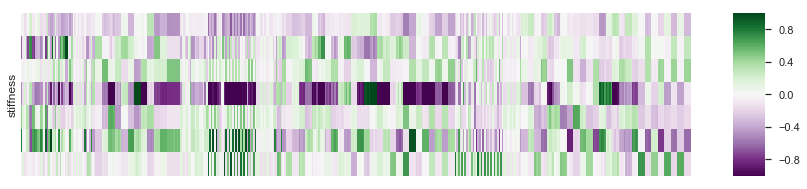

In [31]:
sns.set(rc={'figure.figsize':(15, 3)})

mean_per_stiffness = features_norm.groupby('stiffness')[feature_cols].mean()

sns.heatmap(mean_per_stiffness, 
            vmin = -1, vmax = 1,
            cmap=sns.color_palette("PRGn", 100), 
            cbar_kws={"aspect": 5},
            xticklabels=False, yticklabels=False);

plt.savefig('../results/All features agg heatmap.png', bbox_inches='tight', dpi=300);